# Car Sales - Regression ANN

### by ReDay Zarra

This project utilizes an **artificial neural network to perform a regression task**, which means the model will predict a value based on the features. In this case, the model will have **eight features to predict the purchasing amount** for each customer. This project showcases a *step-by-step implementation* of the model as well as *in-depth notes* to customize the model further for higher accuracy.

## Importing the necessary libraries

In [91]:
import pandas as pd
import numpy as np

> Classic libraries that will help us read and analyze data. Pandas is a library used **for data frame manipulations**. NumPy is a package used for **numerical analysis**.

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

> Libraries used for **plotting and data visualization**.

## Importing the dataset

Importing the dataset with the **.read_csv method from Pandas to load the dataset** and storing it **in the car_data** variable. However, we will need to change to encoding for the data file because it contains characters (such as '@') that Pandas can't read. We specify the ISO-8859-1 encoding for the datafile to be imported. 

In [93]:
car_data = pd.read_csv('Car_Purchasing_Data.csv', encoding = "ISO-8859-1")

> The .read_csv method from Pandas accepts a parameter called **encoding** which allows us to specify that we want to **use the ISO-8859-1** encoding method.

In [94]:
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


> The .head() method is used to **show the first five rows** of the dataframe.

## Visualizing the dataset

Using Seaborn to create plots and visualizing the data that we are working with. 

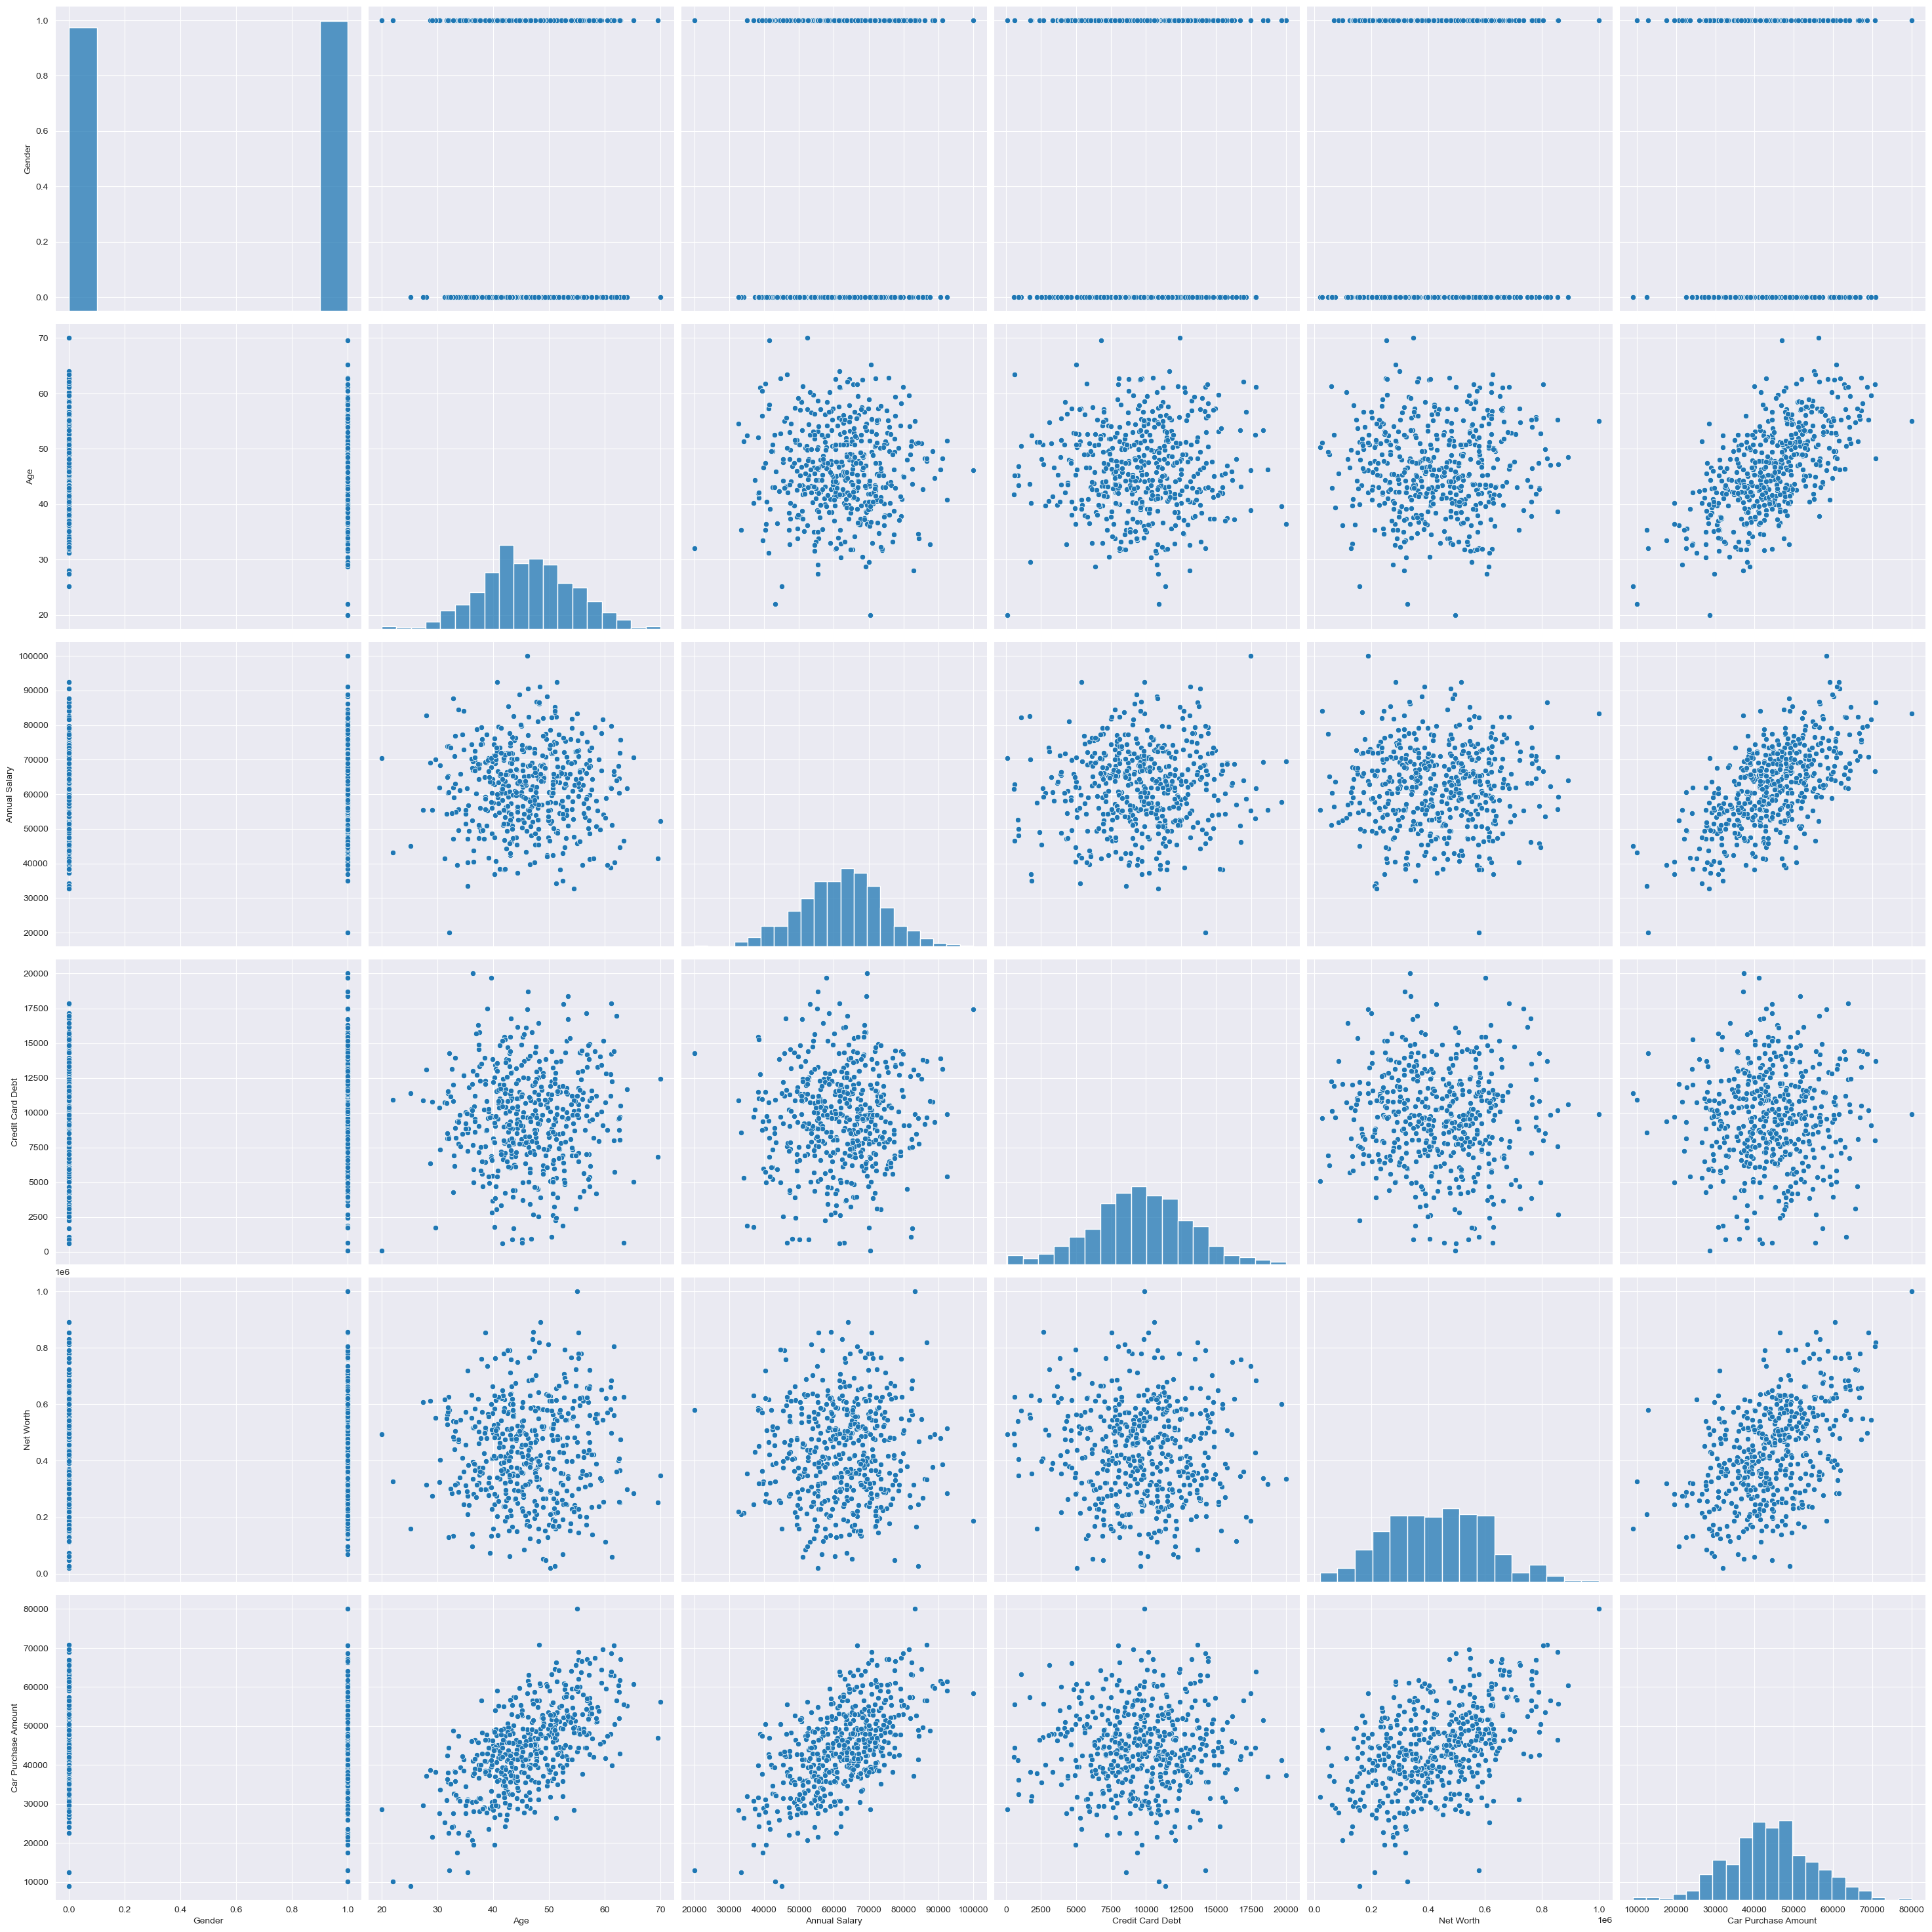

In [95]:
sns.pairplot(car_data, height = 5, aspect = 1)
plt.show()

## Cleaning & Splitting the dataset

Cleaning the training and testing data by removing variables that we don't need.
This reduces unnecessary data that our model can't use, and allows for higher
accuracy.

In [103]:
X = car_data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


> Using the **.drop() function allows us to specify what data we want to remove**. The axis parameter specifies that we want to drop the column (axis = 1) and not the row (axis = 0).

In [104]:
y = car_data['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

> Assigning the variable **y to be the Car Purchase Amount column** from the dataset.

In [105]:
X.shape

(500, 5)

> Verifying the shape of the **features dataset which is 500 rows and 7 columns**.

In [106]:
y.shape

(500,)

> Verifying the shape of the features dataset which is **500 rows all in one column**

## Normalizing the data

Without normalizing the data to have them be in a similar numeric range, the model will have horrible accuracy. Which is why its crucial that we scale the data for the model to train properly.

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

> Importing the MinMaxScaler class and **creating the scaler object**

In [108]:
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(500, 5)

> **Storing the scaled data values in** a new matrix called **X_scaled**. The .fit_transform function is used to **apply the MinMaxScaler to the X dataset**.

In [110]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

## Training the model